## Initializing the analysis

In [1]:
import numpy as np
from ase import Atoms
from ase.io import read
from quests.descriptor import QUESTS
from quests.distance import compare_matrices
from quests.environment import extract_environment

import matplotlib.pyplot as plt
from matplotlib import cm

import nglview as nv

In [2]:
dset = read("../data/GAP-20.xyz", index=":")
quests = QUESTS(cutoff=5, k=32)

## Visualizing a single environment

In [3]:
atoms = dset[8680]
x1, x2 = quests.get_descriptors(atoms)

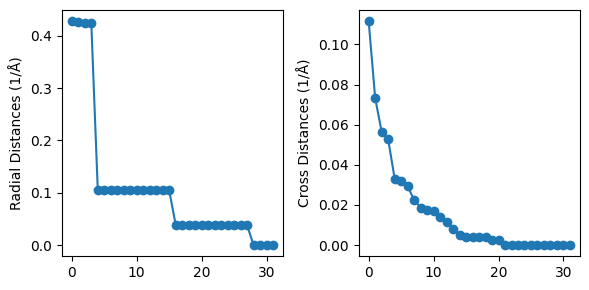

In [4]:
fig, ax_fig = plt.subplots(1, 2, figsize=(6, 3))

idx = 0

ax = ax_fig[0]
ax.plot(x1[idx], "o-")
ax.set_ylabel("Radial Distances (1/Å)")

ax = ax_fig[1]
ax.plot(x2[idx], "o-")
ax.set_ylabel("Cross Distances (1/Å)")

fig.tight_layout()
plt.show()

In [5]:
env = extract_environment(atoms, 0, cutoff=5.0, k=16)

view = nv.show_ase(env)
view.add_unitcell()
view

NGLWidget()

## Comparing different environments

In [6]:
a1 = dset[0]
r1, d1 = quests.get_descriptors(a1)

a2 = dset[8680]
r2, d2 = quests.get_descriptors(a2)

print(f"a1: {a1.info['config_type']}")
print(f"a2: {a2.info['config_type']}")

a1: Amorphous_Bulk
a2: Diamond


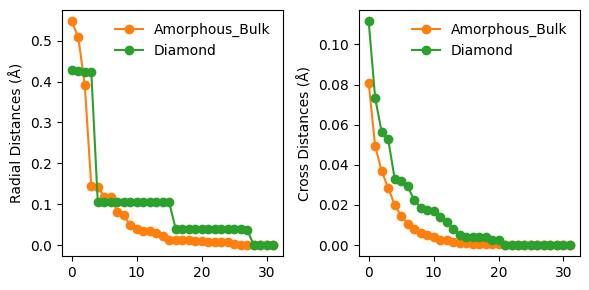

In [7]:
fig, ax_fig = plt.subplots(1, 2, figsize=(6, 3))

idx = 0

ax = ax_fig[0]
ax.plot(r1[idx], "o-", color=cm.tab10(1), label=a1.info["config_type"])
ax.plot(r2[idx], "o-", color=cm.tab10(2), label=a2.info["config_type"])
ax.set_ylabel("Radial Distances (Å)")
ax.legend(frameon=False)

ax = ax_fig[1]
ax.plot(d1[idx], "o-", color=cm.tab10(1), label=a1.info["config_type"])
ax.plot(d2[idx], "o-", color=cm.tab10(2), label=a2.info["config_type"])
ax.set_ylabel("Cross Distances (Å)")
ax.legend(frameon=False)

fig.tight_layout()
plt.show()

## Computing the distances between environments

In [8]:
a1 = dset[0]
x1, x2 = quests.get_descriptors(a1)

a2 = dset[8680]
y1, y2 = quests.get_descriptors(a2)

print(f"a1: {a1.info['config_type']}")
print(f"a2: {a2.info['config_type']}")

a1: Amorphous_Bulk
a2: Diamond


(64, 32)

In [14]:
dm = compare_matrices(x1, x2, y1, y2, metric="frobenius")

TypeError: 'NoneType' object cannot be interpreted as an integer

In [ ]:
print(x1.shape, y1.shape)
dm.shape

In [13]:
i1, i2 = np.where(dm == dm.min())
i1, i2 = i1.item(), i2.item()
print(i1, i2)

43 5


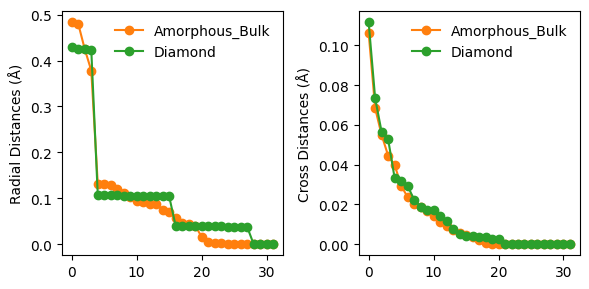

In [12]:
fig, ax_fig = plt.subplots(1, 2, figsize=(6, 3))

idx = 0

ax = ax_fig[0]
ax.plot(r1[i1], "o-", color=cm.tab10(1), label=a1.info["config_type"])
ax.plot(r2[i2], "o-", color=cm.tab10(2), label=a2.info["config_type"])
ax.set_ylabel("Radial Distances (Å)")
ax.legend(frameon=False)

ax = ax_fig[1]
ax.plot(d1[i1], "o-", color=cm.tab10(1), label=a1.info["config_type"])
ax.plot(d2[i2], "o-", color=cm.tab10(2), label=a2.info["config_type"])
ax.set_ylabel("Cross Distances (Å)")
ax.legend(frameon=False)

fig.tight_layout()
plt.show()

In [13]:
view = nv.show_ase(a1)
view.add_unitcell()
view

NGLWidget()

In [14]:
env = extract_environment(a1, i1, cutoff=5.0, k=16)

view = nv.show_ase(env)
view.add_unitcell()
view

NGLWidget()

No such comm: fc20cade351741969a30bc903deca32d
